# Data Preparation

In [2]:
from pyts.datasets import make_cylinder_bell_funnel

In [3]:
X, y = make_cylinder_bell_funnel(n_samples=1000, random_state=42)

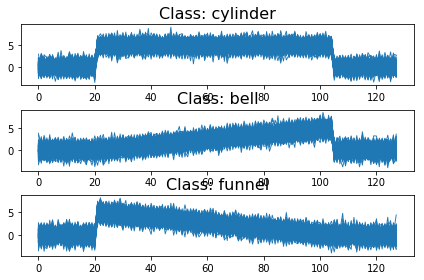

In [6]:
plt.figure()
for i, classe in enumerate(['cylinder', 'bell', 'funnel']):
    plt.subplot(3, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

# Data Normalization

In [2]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

Using TensorFlow backend.
/Users/riccardo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/riccardo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/riccardo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/riccardo/opt/anaconda3/lib/p

In [5]:
scaler = TimeSeriesScalerMinMax()
X = scaler.fit_transform(X).reshape(X.shape[0], X.shape[1])

# Time Series Classifier

In [32]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 1.0
F1-score [1. 1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [33]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9733333333333334
F1-score [0.95918367 0.99       0.97058824]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       100
           1       0.99      0.99      0.99       100
           2       0.95      0.99      0.97       100

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [34]:
from pyts.classification import KNeighborsClassifier

In [35]:
clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 1.0
F1-score [1. 1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
# Time Series Classifier

clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# LSTM Classifier

In [9]:
from keras.layers import LSTM

In [47]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(256, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [48]:
lstm = build_lstm(n_timesteps, n_outputs)

In [49]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 280,835
Trainable params: 280,835
Non-trainable params: 0
_________________________________________________________________


In [50]:
history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=mini_batch_size, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Train on 560 samples, validate on 140 samples
Epoch 1/10
560/560 [==============================] - 0s 494us/step - loss: 0.3096 - accuracy: 0.9786 - val_loss: 1.0019 - val_accuracy: 0.4786
Epoch 2/10
560/560 [==============================] - 0s 483us/step - loss: 0.2031 - accuracy: 0.9982 - val_loss: 0.9529 - val_accuracy: 0.4857
Epoch 3/10
560/560 [==============================] - 0s 477us/step - loss: 0.1474 - accuracy: 0.9946 - val_loss: 0.8271 - val_accuracy: 0.8286
Epoch 4/10
560/560 [==============================] - 0s 481us/step - loss: 0.1153 - accuracy: 0.9964 - val_loss: 0.6623 - val_accuracy: 0.9643
Epoch 5/10
560/560 [==============================] - 0s 476us/step - loss: 0.0897 - accuracy: 0.9946 - val_loss: 0.5490 - val_accuracy: 0.9571
Epoch 6/10
560/560 [==============================] - 0s 449us/step - loss: 0.0679 - accuracy: 0.9964 - val_loss: 0.3763 - val_accuracy: 1.0000
Epoch 7/10
560/560 [==============================] - 0s 468us/step - loss: 0.0645 - accur

In [51]:
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3333333333333333
F1-score [0.  0.5 0. ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.33      1.00      0.50       100
           2       0.00      0.00      0.00       100

    accuracy                           0.33       300
   macro avg       0.11      0.33      0.17       300
weighted avg       0.11      0.33      0.17       300



In [52]:
lstm.evaluate(X_test_cnn, y_test)

300/300 [==============================] - 0s 1ms/step


[1.0984290631612141, 0.3333333432674408]

# Multivariate Time Series Classifiers

In [4]:
from pyts.datasets import load_basic_motions

from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = load_basic_motions(return_X_y=True)
X_train.shape

(40, 6, 100)

In [6]:
scaler = TimeSeriesScalerMinMax()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
y_train.shape

(40,)

In [8]:
y_train

array([b'Standing', b'Standing', b'Standing', b'Standing', b'Standing',
       b'Standing', b'Standing', b'Standing', b'Standing', b'Standing',
       b'Running', b'Running', b'Running', b'Running', b'Running',
       b'Running', b'Running', b'Running', b'Running', b'Running',
       b'Walking', b'Walking', b'Walking', b'Walking', b'Walking',
       b'Walking', b'Walking', b'Walking', b'Walking', b'Walking',
       b'Badminton', b'Badminton', b'Badminton', b'Badminton',
       b'Badminton', b'Badminton', b'Badminton', b'Badminton',
       b'Badminton', b'Badminton'], dtype='|S12')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [11]:
X_train = X_train.reshape(40, 100, 6)
X_test = X_test.reshape(40, 100, 6)

In [12]:
n_timesteps, n_outputs, n_features = X_train.shape[1], len(np.unique(y_train)), X_train.shape[2] 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)
print("N. FEATURES: ", n_features)

TIMESTEPS:  100
N. LABELS:  4
N. FEATURES:  6


In [13]:
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [54]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, Conv2D, MaxPool2D, Flatten, Dropout, LeakyReLU, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [25]:
def build_lstm2(n_timesteps, n_outputs, n_features):
    model = Sequential()
    model.add(LSTM(4, input_shape=(n_timesteps, n_features), return_sequences=True, 
                        kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    
    #1
    for _ in range(2):
        model.add(LSTM(4, kernel_initializer='TruncatedNormal', return_sequences=True))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.04))   

    #2
    model.add(LSTM(32, kernel_initializer='TruncatedNormal', return_sequences=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.7))
    
    #3
    for _ in range(2):
        model.add(Dense(256, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.2))
    #4
    for _ in range(1):
        model.add(Dense(64, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.7))

    #5
    model.add(Dense(32, kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.4))
        
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [26]:
lstm2 = build_lstm2(n_timesteps, n_outputs, n_features)

In [27]:
lstm2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 4)            176       
_________________________________________________________________
batch_normalization_23 (Batc (None, 100, 4)            16        
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 100, 4)            0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 100, 4)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 4)            144       
_________________________________________________________________
batch_normalization_24 (Batc (None, 100, 4)            16        
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 100, 4)           

In [28]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_lstm2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [29]:
history_lstm2 = lstm2.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                          validation_data=(X_val_cnn, y_val_cnn)).history

Train on 32 samples, validate on 8 samples
Epoch 1/50
32/32 [==============================] - 4s 120ms/step - loss: 1.6396 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/50
32/32 [==============================] - 1s 30ms/step - loss: 1.3807 - accuracy: 0.4062 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/50
32/32 [==============================] - 1s 32ms/step - loss: 1.4749 - accuracy: 0.2188 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/50
32/32 [==============================] - 1s 34ms/step - loss: 1.4223 - accuracy: 0.2188 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/50
32/32 [==============================] - 1s 33ms/step - loss: 1.3451 - accuracy: 0.4062 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 6/50
32/32 [==============================] - 1s 32ms/step - loss: 1.4631 - accuracy: 0.2500 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 7/50
32/32 [==============================] - 1s 34ms/step - loss: 1.4985 - accuracy: 0.2188 - val_loss:

In [30]:
y_pred = np.argmax(lstm2.predict(X_test), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.25
F1-score [0.  0.  0.  0.4]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.25      1.00      0.40        10

    accuracy                           0.25        40
   macro avg       0.06      0.25      0.10        40
weighted avg       0.06      0.25      0.10        40



/Users/riccardo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
